# Sprint 8 </br>
******  
Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.</br>
Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.</br>

1) **Antes de empezar he instalado Miniconda en el ordenador, usando Windows PowerShell**:</br> wget "https://repo.anaconda.com/miniconda/Miniconda3-latest-Windows-x86_64.exe" -outfile ".\miniconda.exe"
Start-Process -FilePath ".\miniconda.exe" -ArgumentList "/S" -Wait
del .\miniconda.exe </br>
2) **He instalado en Visual Studio Code lo necesario para empezar:**</br>
    *pip install mysql-connector-python</br>
    *pip install numpy pandas seaborn matplotlib</br>
3) **He realizado las mismas instalaciones en el entorno Conda:**</br>
    *conda install mysql-connector-python</br>
    *conda install numpy pandas seaborn matplotlib</br>
4) **Y por último, en el entorno Jupyter Notebook como puede verse a continuación**</br>
    *import sys</br>
    !{sys.executable} -m pip install mysql-connector-python pandas seaborn matplotlib numpy ipywidgets</br>

    

In [3]:
import sys
!{sys.executable} -m pip install --upgrade pip

import sys
!{sys.executable} -m pip install mysql-connector-python pandas seaborn matplotlib numpy sqlalchemy

# Nivel 1</br>
***
**Preparación** </br>
****
Importamos librerias

In [4]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sqlalchemy 
from sqlalchemy import create_engine


Conectamos con la base de datos y le pedimos que nos muestre las tablas que hay. <br>
Limpio los null y pido que cargue incluso las filas vacias con *pd.set_option("display.max.columns", None)*<br>
Le pido que me avise de errores con<br>
*except Error as e:
    print("Error while connecting to MySQL", e)* <br>
Cerramos las conexiones cuando ya no son necesarias porque hemos cargado las tablas aquí<br>
*finally:
    if conn.is_connected():
        cursor.close() 
        conn.close()*

In [5]:

try:
    conn = mysql.connector.connect(host='localhost',
                                        database='transactions_s4',
                                        username='root',
                                        password='root')
    if conn.is_connected():
        cursor = conn.cursor() 
        cursor.execute(f"SHOW TABLES") 
        tablas = [tabla[0] for tabla in cursor.fetchall()] 
       
        
        pd.set_option("display.max.columns", None)

        for tabla in tablas:  
            cursor.execute(f"SELECT * FROM {tabla}")
            columnas = [columna[0] for columna in cursor.description] 
            

            globals()[f'df_{tabla}'] = pd.DataFrame(cursor.fetchall(), columns=columnas)

            print(f"DataFrame df_{tabla} cargado con éxito!")

except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if conn.is_connected():
        cursor.close() 
        conn.close() 
        print("MySQL connection is closed") 

print(type(df_transactions))

DataFrame df_bridge_products cargado con éxito!
DataFrame df_companies cargado con éxito!
DataFrame df_credit_card_status cargado con éxito!
DataFrame df_credit_cards cargado con éxito!
DataFrame df_products cargado con éxito!
DataFrame df_transactions cargado con éxito!
DataFrame df_users cargado con éxito!
MySQL connection is closed
<class 'pandas.core.frame.DataFrame'>


### Clasificamos las variables:<br>
**Númericas**(aquellas que tienen un siginificado mátematico)<br>
<ul>•price-products-<br>
•weight -products-<br>
•amount -transactions-<br>
•declined -transactions-(si se cuenta el porcentaje de transacciones rechazadas)<br>
•birth_date -user- (solo si se convierte a edad)<br></ul> <br>

**Categoricas** (datos cualitativos)<br><br>
products<br><ul> 
    • id <br>
    • product_name <br>
    • colour<br>
    • warehouse_id <br>
    • declined (categórica si solo se usa para clasificar (0 = aprobada, 1 = declinada)) <br> <br></ul> 
companies<br><ul> 
    • company_id <br>
    • company_name <br>
    • phone <br>
    • email <br>
    • country<br>
    • website<br></ul> 
transactions<br><ul> 
    • id <br>
    • card_id<br>
    • business_id<br>
    • user_id<br>
    • product_ids<br> 
    • lat<br> 
    • longitude<br></ul> 
 users<br><ul> 
    • id<br>
    • name<br>
    • surname<br>
    • phone<br>
    • email<br>
    • country<br>
    • city <br>
    • postal_code<br>
    •birth_date → Fecha de nacimiento (puede tratarse como categórica si no se convierte a edad)<br>
    • address<br></ul> 
credit_cards<br><ul> 
    • id <br>
    • user_id<br>
    • iban<br>
    • pan <br>
    • pin<br>
    • cvv <br>
    • track 1 <br>
    • track 2 <br>
    • expiring_date<br></ul> 
credit_card_status<br><ul> 
    • card_id <br>
    • status <br>


## Ejercicio 1
*********
**Una variable numérica**

Generé un histograma con  *sns.histplot(df_transactions['amount'], bins=20, kde=True, color="purple")*  para visualizar la distribución de los montos de transacciones (amount) en df_transactions.<br>
Luego indagué como poner numeros encima de las barras y descubrí que un ejercicio sencillo se había complicado. Había que hacer que python encontrara las barras (patches), determinara su altura, que no mostrara etiquetas en barras vacias y que colocara el texto un poco por encima de las barras y centrado. Por último use *suptitle* para  crear un titulo superior para el ejercicio.
<br><br>

He usado un histograma porque creo que es la mejor manera de visualizar la distribución de una variable numérica.<br>
Permite ver cómo se agrupan los valores, si los montos de las transacciones están centrados en ciertos rangos o si están distribuidos uniformemente.<br>
La curva de densidad ayuda a suavizar la interpretación y muestra la tendencia general sin las irregularidades de las barras.<br><br>
Podemos ver, a través de la curva, que la diferencia entre compras de productos más economicos y los de precios más elevado no es muy grande. <br>Sin embargo si hay algo que resaltaría es que los que se venden menos son los de 75$, 225$ y 350$<br>
*consejo gastos de envio o promo*

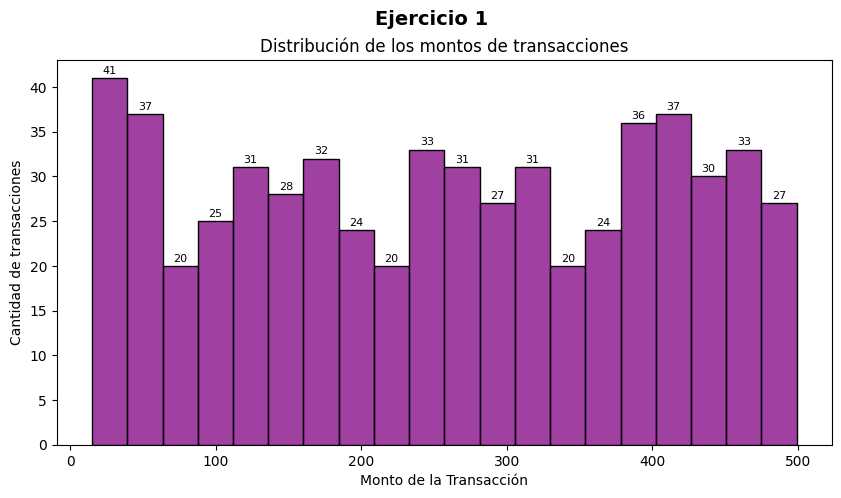

In [6]:


plt.figure(figsize=(10,5))

ax = sns.histplot(df_transactions['amount'], bins=20, kde=False, color="purple")

for patch in ax.patches: 
    height = patch.get_height() 
    if height > 0:  
        plt.text(patch.get_x() + patch.get_width()/2,  
                 height + 0.5,  
                 f'{int(height)}',  
                 ha='center', fontsize=8, color='black')  

plt.xlabel("Monto de la Transacción")
plt.ylabel("Cantidad de transacciones")
plt.title("Distribución de los montos de transacciones")
plt.suptitle("Ejercicio 1", fontsize=14, fontweight='bold')

plt.show()


## Ejercicio 2
*********
**Dos variables numéricas** <br>

El scatterplot es útil para visualizar de manera fácil y rapida si existe algun patrón o alguna correlacion entre dos varibles, precio y monto en este caso.<br>
Cada punto azul representa una transacción individual donde se vendió un producto a cierto precio y con un monto asociado.<br>
alpha=0.6: Hace los puntos algo transparentes para ver mejor si hay acumulaciones.<br>
En este gráfico no parece haber una correlación entre monto y precio.<br>
Llama la atención por eso que hay agrupaciones verticales en ciertos precios: por ejemplo, muchas transacciones se concentran exactamente en ciertos valores de precio (como 25, 50, 75, 100...).<br>

 

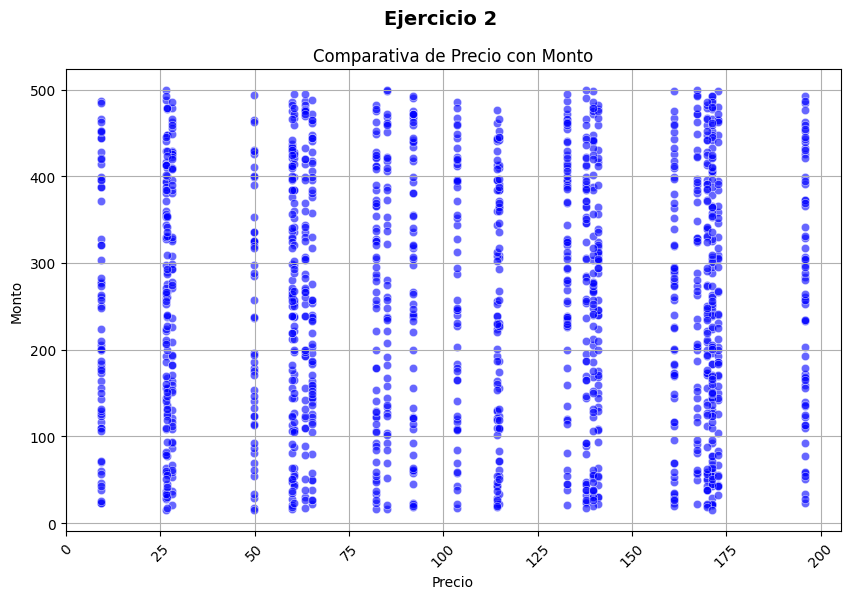

In [7]:
df_intermedio = pd.merge(df_transactions, df_bridge_products, left_on='id', right_on='transactions_id')
df_puente = pd.merge(df_intermedio, df_products, left_on='products_id', right_on='id')

columnas_interes = ['price', 'amount']
df_numeric = df_puente[columnas_interes].copy()
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_puente, 
    x='price', 
    y='amount',   
    color='blue',
    alpha=0.6
)

plt.xticks(rotation=45)
plt.xlabel("Precio")
plt.ylabel("Monto")
plt.title("Comparativa de Precio con Monto")
plt.grid(True) 
plt.suptitle("Ejercicio 2", fontsize=14, fontweight='bold')
plt.show()



## Ejercicio 3
*******
**Una variable categórica**

 **v1- Gráfico de Pastel**<br><br>
 Este código genera un gráfico de pastel (pie chart) para representar la proporción de transacciones aprobadas vs. declinadas en la base de datos. <br>
 He dudado mucho dónde poner este gráfico, porque al ser un porcentaje podría ir en variable númerica, pero como lo que cuenta es la cantidad de declinadas y aprobadas, es categorica. <br>
 Primerop he usado *df_transactions['declined'].map({1: 'Declinadas', 0: 'Aprobadas'})* para convertir los valores booleanos en etiquetas claras.<br>
 Despues con *value_counts()* he contado cuantas hay de cada tipo.<br>
 Y con *plt.pie()* se crea el grafico de pastel. <br>
 Al elegir colores más neutros, vi que los números no se veian bien, así que investigué como cambiar los colores de dentro, encontrando que *textprops* es muy útil para eso.<br>

He elegido el gráfico de pastel (pie chart) porque al haber sólo dos opciones es muy fácil de ver y comparar <br>
Permite visualizar rápidamente la diferencia entre transacciones aprobadas y rechazadas. <br> 
Muestra los porcentajes dentro del gráfico, lo que facilita la interpretación sin necesidad de leer datos adicionales. <br> 

Podemos ver que la gran mayoría de transacciones han sido aprobadas (85.2%), lo cual es positivo para la empresa. Refleja que hay buenas medidas de seguridad y pocos errores.<br>
Aún así sería bueno hacer un analisis más profundo acerca de si esto ocurre con algún país, empresa o cliente concreto para tomar las acciones necesarias. <br>

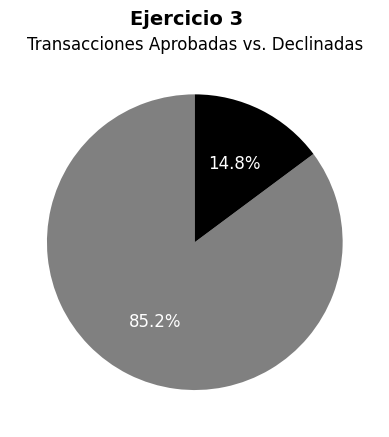

In [8]:
df_declinadas = df_transactions['declined'].map({1: 'Declinadas', 0: 'Aprobadas'}).value_counts()
labels = df_declinadas.index
colors = ['grey', 'black']

plt.pie(
    df_declinadas, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors,
    textprops={'color': 'white', 'fontsize': 12}
)

plt.title("Transacciones Aprobadas vs. Declinadas")
plt.suptitle("Ejercicio 3", fontsize=14, fontweight='bold')
plt.show()

## Ejercicio 4
*******
**Una variable categórica y una numérica**

Este código genera un gráfico de barras que muestra las 10 empresas con más ventas.<br> 
Al principio lo habia hecho con query de sql, pero me avisaron que era mejor que usara merge para estos ejercicios, así que toco rehacerlos. <br> 
Afortunadamente, existen las cheat-sheet para cosas como esta, *pd.merge(df_transactions, df_companies, left_on='business_id', right_on='company_id')*<br> 
Y como me leía alguna columna como string y no como texto, tocó buscar como hacerlo con el *pd.to_numeric(df_companyia['amount'], errors='coerce')*<br> 
Despues ya agrupamos por empresa, le pedimos que solo nos muestre las diez conm mayor amount y ya podemos graficar y personalizar. <br> <br> 
El barplot  permite visualizar facilmente la diferencia entre las empresas y los colores elegidos ayudan a hacerlo aún más fácil de identificar. <br> 
Originalmente había elegido una sola escala de colores (Blues), pero con la difereciación por amount (hue) las últimas tres empreas casi no se veian.<br> <br> 

 *Nunc Interdum Incorporated* domina en ventas, claramente y con mucha ventaja sobre las últimas del top 10<br> 
 Del segundo puesto al sexto, está más equilibrao, luego en el septimo da un repentino bajón y aún desciende más en las últimas tres. <br> 
Habría que probar a seguir  las estrategias de venta de *Nunc Interdum Incorporated* en las últimas compañias para ver si consiguen remontar con eso.<br> 

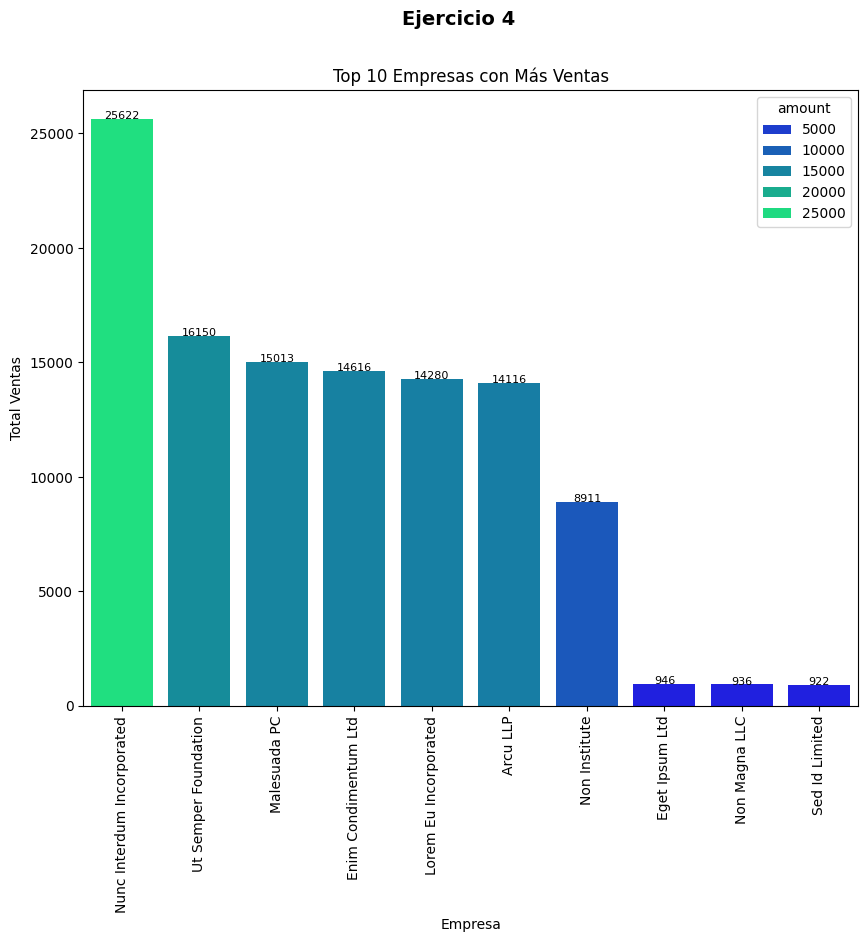

In [9]:

# Fusionar transacciones con empresas
df_companyia = pd.merge(df_transactions, df_companies, left_on='business_id', right_on='company_id')

# Convertir 'amount' a numérico
df_companyia['amount'] = pd.to_numeric(df_companyia['amount'], errors='coerce')

# Agrupar por empresa sumando las ventas totales
df_ventas = df_companyia.groupby('company_name')['amount'].sum().reset_index()

# Seleccionar las 10 empresas con más ventas
top_n = 10  
df_top = df_ventas.nlargest(top_n, 'amount')  

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8))

# Graficar
bars = sns.barplot(
    data=df_top, 
    x='company_name',  
    y='amount', 
    palette="winter",
    hue='amount',
    ax=ax  
)

# Añadir etiquetas de valores sobre las barras
for patch in bars.patches: 
    height = patch.get_height() 
    if height > 0:  
        ax.text(patch.get_x() + patch.get_width()/2,  
                height + 1,  
                f'{int(height)}',  
                ha='center', fontsize=8, color='black') 

# Ajustes del gráfico
plt.xticks(rotation=90)
plt.xlabel("Empresa")
plt.ylabel("Total Ventas")
plt.title("Top 10 Empresas con Más Ventas")
plt.suptitle("Ejercicio 4", fontsize=14, fontweight='bold')

plt.show()


## Ejercicio 5
*******
**Dos variables categóricas**

Este enorme gráfico permite visualizar la distribución de productos en distintos almacenes de un solo vistazo, algo que sería difícil de analizar solo con tablas.<br> 
Es fácil detectar qué productos están en qué almacenes, gracias a los colores.<br> 
Llama la atención la gran cantidad de celdas con valores 0 (color azul), parece como si cada almacen se encargase de uno o muy pocos productos.<br> 
Se podrían redistribuir productos entre almacenes para equilibrar el stock y evitar sobrecarga en algunos centros.<br> 
Para hacerlo he usado crosstab, que calcula una tabla de frecuencias de las variables elegidas. Despues he tenido que jugar un poco con el tamaño hasta conseguir que se vea fácilmente , he elegido coolwarm por lo mismo, para que se vea de un vistazo con colores contrastados.

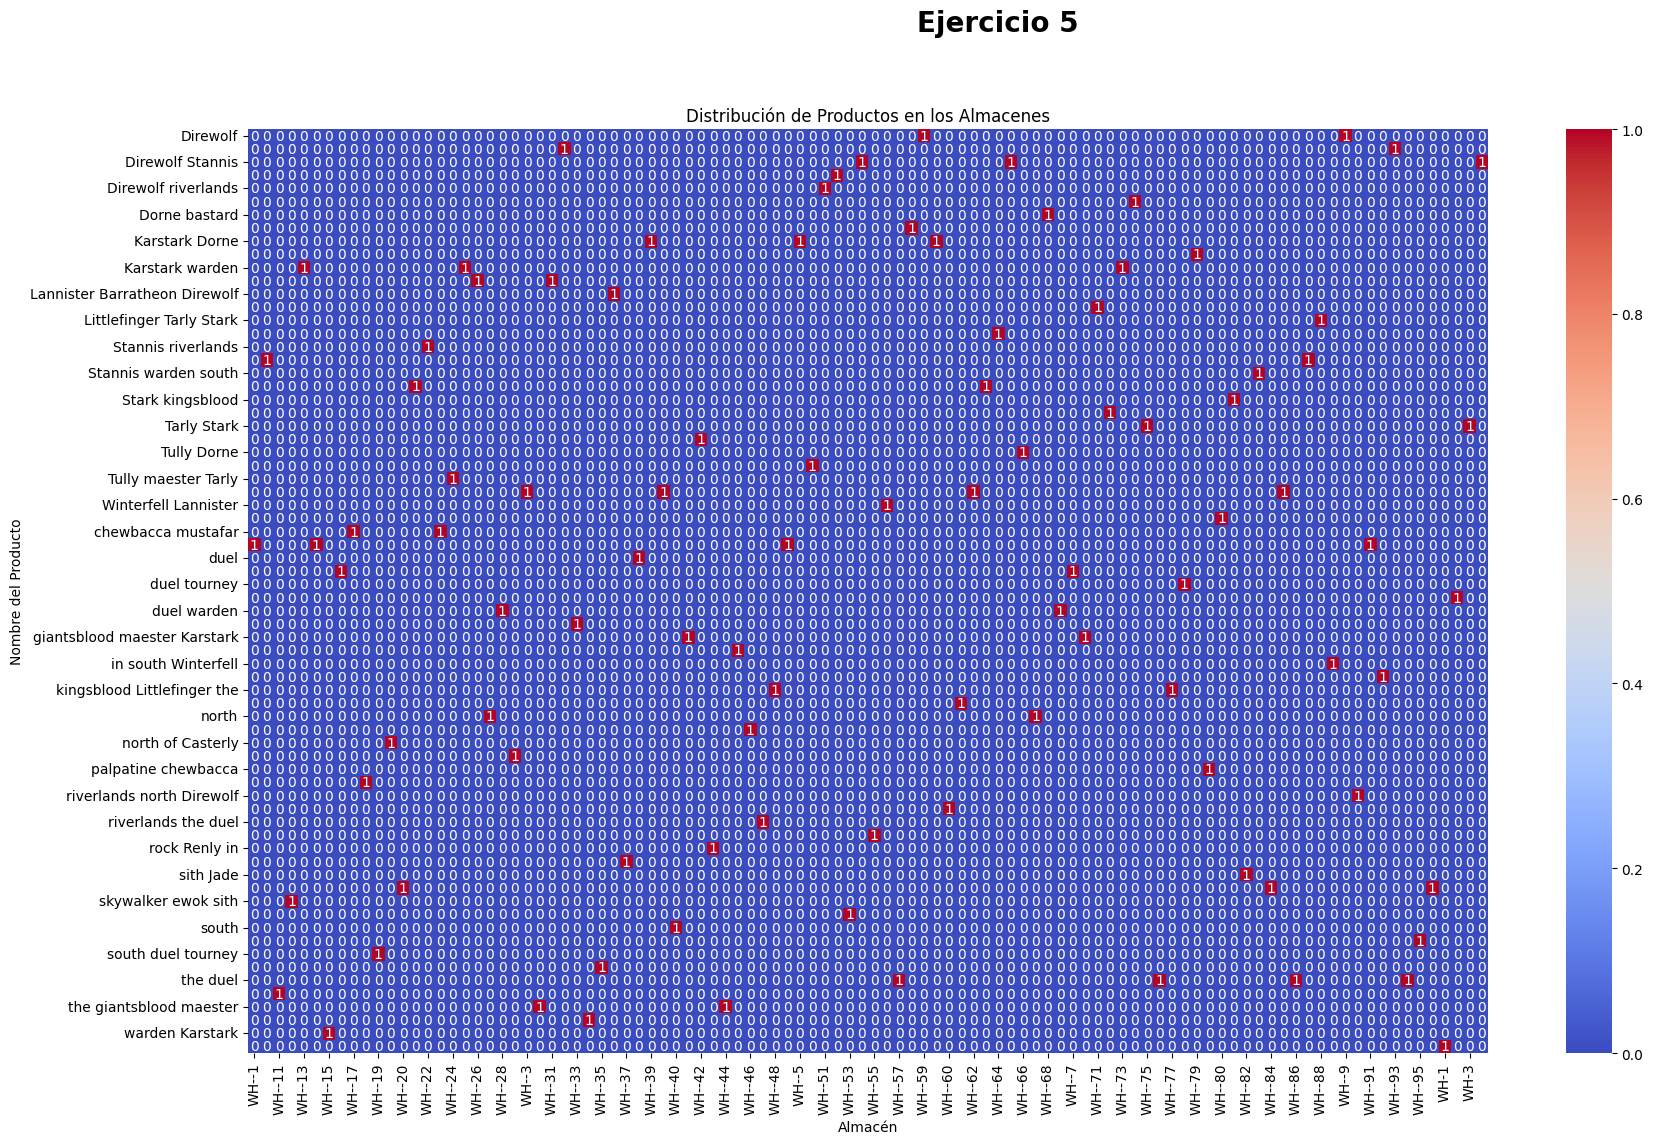

In [10]:
df_almacen = pd.crosstab(df_products['product_name'], df_products['warehouse_id'])

plt.figure(figsize=(20,12))
sns.heatmap(df_almacen, cmap="coolwarm", annot=True)
plt.xlabel("Almacén")
plt.ylabel("Nombre del Producto")
plt.title("Distribución de Productos en los Almacenes")
plt.suptitle("Ejercicio 5", fontsize=20, fontweight='bold')
plt.show()


## Ejercicio 6
*******
**Tres variables**

Para este ejercicio he elegido el gráfico de barras agrupadas ya que permite comparar fácilmente la cantidad de transacciones aprobadas y rechazadas por pais.<br> 
Se puede detectar si ciertos países tienen más problemas con transacciones rechazadas de un solo vistazo. <br> 
Para el código he empezado combinando tablas *df_companyia = pd.merge(df_transactions, df_companies, left_on='business_id', right_on='company_id')* para obtener paises y transacciones.<br> 
Despues he tenido que convertir declined a *integer* porque sino no me deja agrupar correctamente *df_companyia['declined'] = df_companyia['declined'].astype(int)*<br> 
Despues hemos agrupado  datos con el *count* y hemos seleccionado el top 10 de paises con más transacciones, como lo que hicimos en empresas anterioremente. <br> 
Luego ya la creación y personificación del gráfico.<br> <br> 

Alemania, Reino Unido y Suecia tienen un número elevado de transacciones, lo que indica que son mercados con más actividad comercial.<br> 
Las transacciones declinadas tienen un porcentaje bajo en generalSin embargo, algunos países como Suecia y Países Bajos tienen más transacciones rechazadas, lo que podría indicar problemas en  políticas de seguridad más estrictas o diferencias de hábitos de pago.<br> 

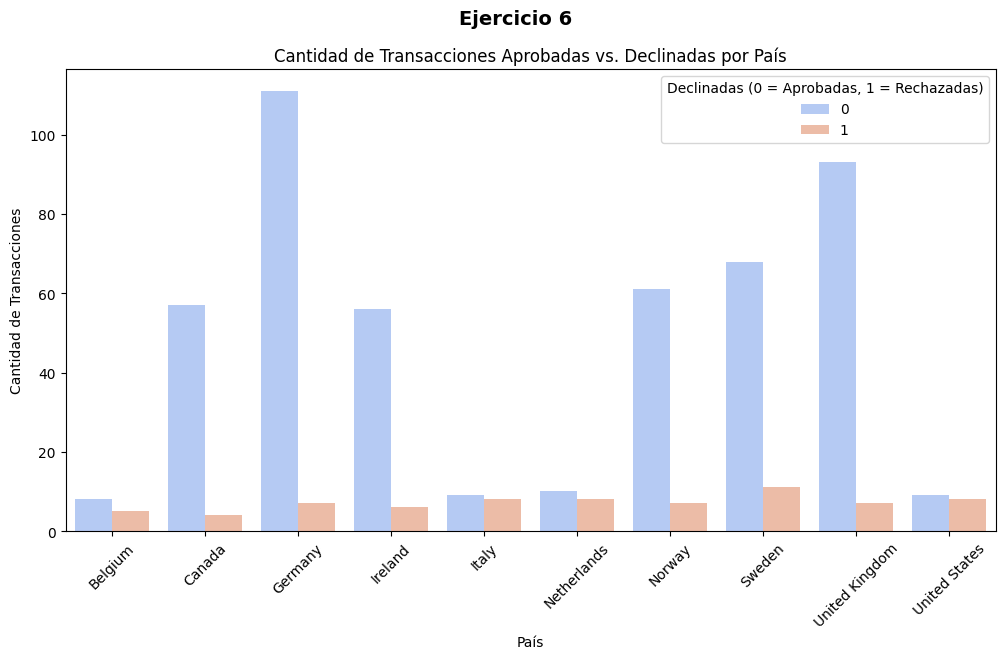

In [11]:
df_companyia = pd.merge(df_transactions, df_companies, left_on='business_id', right_on='company_id')

df_companyia['declined'] = df_companyia['declined'].astype(int)
df_transacciones = df_companyia.groupby(['country', 'declined']).size().reset_index(name='count')

top_countries = df_companyia.groupby('country').size().nlargest(10).index
df_top = df_transacciones[df_transacciones['country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_top, 
    x='country', 
    y='count', 
    hue='declined', 
    palette="coolwarm"
)

plt.xticks(rotation=45)
plt.xlabel("País")
plt.ylabel("Cantidad de Transacciones")
plt.title("Cantidad de Transacciones Aprobadas vs. Declinadas por País")
plt.suptitle("Ejercicio 6", fontsize=14, fontweight='bold')
plt.legend(title="Declinadas (0 = Aprobadas, 1 = Rechazadas)")

plt.show()




## Ejercicio 7
*******
**Implementa un pairplot**

Para este ejercicio tambien he combinado tablas, transactions con bridge y el resultado con products, para tener todas las variables númericas que necesito. <br>
Despues he seleccionado solo las columnas que me interesaban, es decir price, amount y declined. Por si alguna variable no esta convertida, se pasa a numerica. <br>
Por último se crea el pairplot. <br><br>

Viendo el gráfico no parece haber mucha relación entre las tres variables. Los puntos se dispersan sin formar una tendencia obvia.<br>
El precio individual de los productos no influye directamente en el coste total de la transacción. Hay transacciones con un solo producto caro y transacciones con varios productos economicos. <br>
La mayoria de transacciones fueron aprobadas pero entre las rechazadas encontramos una cantidad ligeramente superior en aquellas transacciones de menor coste. <br>
Habria que añadir variables categoricas como cliente, país o empresa para sacer una información más relevante.


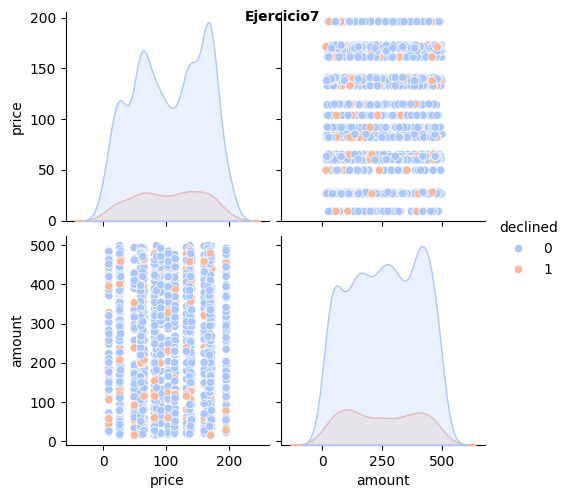

In [12]:

df_intermedio = pd.merge(df_transactions, df_bridge_products, left_on='id', right_on='transactions_id')
df_puente = pd.merge(df_intermedio, df_products, left_on='products_id', right_on='id')

columnas_interes = ['price', 'amount','declined']
df_numeric = df_puente[columnas_interes].copy()
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

sns.pairplot(df_numeric, hue='declined', palette="coolwarm")
plt.suptitle("Ejercicio7", fontsize=10, fontweight='bold')
plt.show()



# Nivel 2</br>
***

## Ejercicio 1</br>
***
**Correlación entre todas las variables númericas**

Como hemos hecho en anteriores ejercios, primero combinamos tablas, de hecho, he reutilizado código cuando posiblemente con usar los nombres hubiera sido suficiente. <br>
Seleccionamos de nuevo las columnas relevantes, convertimos a númerico por si acaso y calculamos la matriz de correlación con *corr_matrix = df_numeric.corr()*<br>
Creamos el heatmap
<ul>annot=True → Muestra los valores numéricos dentro del heatmap.<br>
cmap="coolwarm" → Usa una escala de colores rojo (correlación positiva) a azul (correlación negativa).<br>
fmt=".2f" → Muestra los valores con 2 decimales.<br>
linewidths=0.5 → Agrega bordes entre celdas para mejor visualización</ul><br>

No hay una fuerte correlación entre las variables, ya que la mayoría de los valores están cercanos a 0.<br>
El amount tiene una correlación cercana a 0 con todas las otras variables, lo que sindica que el precio o peso del producto no afectan demasiado al total de la compra.<br>
Declined tampoco tiene una relación fuerte con price o weight, lo que sugiere que las transacciones declinadas no están influenciadas por el precio o peso del producto.<br>
Hay una leve correlación entre price y weight. Suponemos que porque la cantidad de material aumenta el precio del producto.<br>

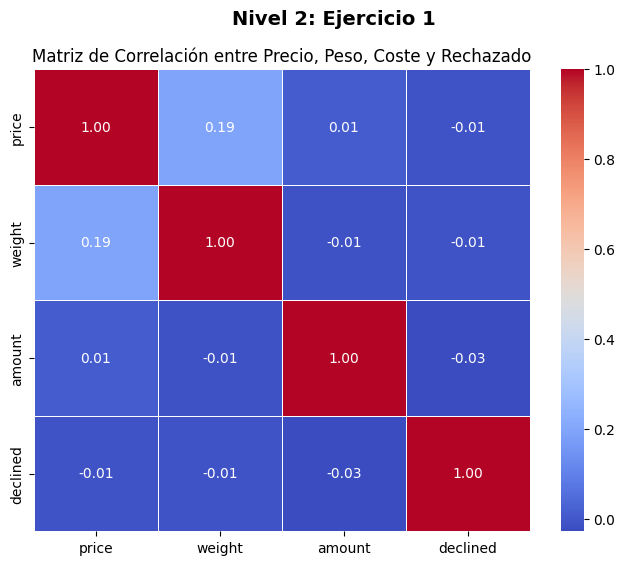

In [13]:
df_intermedio = pd.merge(df_transactions, df_bridge_products, left_on='id', right_on='transactions_id')
df_puente = pd.merge(df_intermedio, df_products, left_on='products_id', right_on='id')
columnas_interes = ['price', 'weight', 'amount','declined']
df_numeric = df_puente[columnas_interes].copy()
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')
corr_matrix = df_numeric.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.suptitle("Nivel 2: Ejercicio 1", fontsize=14, fontweight='bold')
plt.title("Matriz de Correlación entre Precio, Peso, Coste y Rechazado")
plt.show()



## Ejercicio 2
***
**Implementar un Jointplot**

Como hemos hecho en anteriores ejercios, primero combinamos tablas, de hecho, he reutilizado código cuando posiblemente con usar los nombres hubiera sido suficiente. <br>
Seleccionamos de nuevo las columnas relevantes, convertimos a númerico por si acaso y creamos el jointplot. *sns.jointplot(data=df_puente, x='price', y='amount', hue='declined', kind='scatter'* (puede variar, podria ser tambien kde, pero la visualización no es tan clara en este caso),<br> *alpha=0.6)*alpha, añade transparencia u opacidad a los circulos del scatterplot, permitiendo ver más oscuro cuando hay más acumulación. <br><br>

Que nos permite ver este gráfico?
<ul> Vemos que la mayoría de los precios están entre 50 y 200.  <br>
   Los montos de transacción (`amount`) están distribuidos entre 0 y 500, con mayor densidad en los valores intermedios.  <br>
   No parece haber un patrón de declinación relacionado con el precio del producto.  <br>
   No se ve una concentración fuerte de rechazos en montos específicos<br></ul>




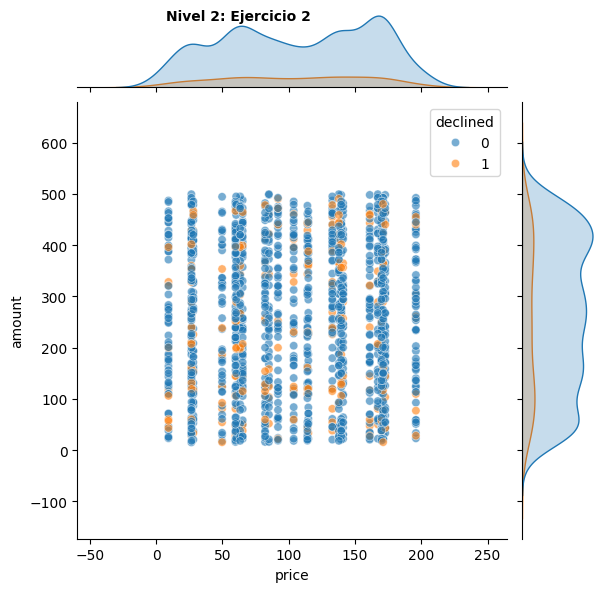

In [14]:
df_intermedio = pd.merge(df_transactions, df_bridge_products, left_on='id', right_on='transactions_id')
df_puente = pd.merge(df_intermedio, df_products, left_on='products_id', right_on='id')
columnas_interes = ['price','amount','declined']
df_numeric = df_puente[columnas_interes].copy()
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

sns.jointplot(data=df_puente, x='price', y='amount', hue='declined', kind='scatter', alpha=0.6)
plt.suptitle("Nivel 2: Ejercicio 2", fontsize=10, fontweight='bold',ha='right')
plt.show()

# Nivel 3
***

## Ejercicio 1
***
**Violinplot combinado con otro gráfico**

Este código genera un Violinplot combinado con un Swarmplot para visualizar la distribución de los montos de transacciones por empresa.<br>
El violinplot muestra la distribución de los montos de transacción dentro de cada empresa, permitiendo visualizar su dispersión y densidad.<br>
El swarmplot ayuda a identificar la ubicación exacta de cada transacción en la distribución general.<br>
Es interesante ver cómo algunas empresas tienen distribuciones de montos de transacción más dispersas, mientras que otras tienen valores más concentrados.<br>
Llama la atención que algunas empresas tienen valores extremos (outliers), lo que indica transacciones atípicas.<br>

Algunas empresas tienen una distribución más estrecha, indicando que la mayoría de sus transacciones están en un rango similar.<br>
Otras empresas tienen una distribución más ancha, lo que indica gran variabilidad en los montos de transacción.<br>
Empresas como Lorem EU Incorporated y Arcu LLP tienen transacciones con montos muy elevados, sugiriendo que manejan grandes volúmenes de venta.<br>
Se observan puntos alejados de la distribución principal en algunas empresas, lo que indica transacciones atípicas o inusualmente altas/bajas.<br>

C:\Users\formacio\AppData\Local\Temp\ipykernel_11704\2116535550.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top, x="company_name", y="amount", inner="quartile", palette="coolwarm", alpha=0.7)


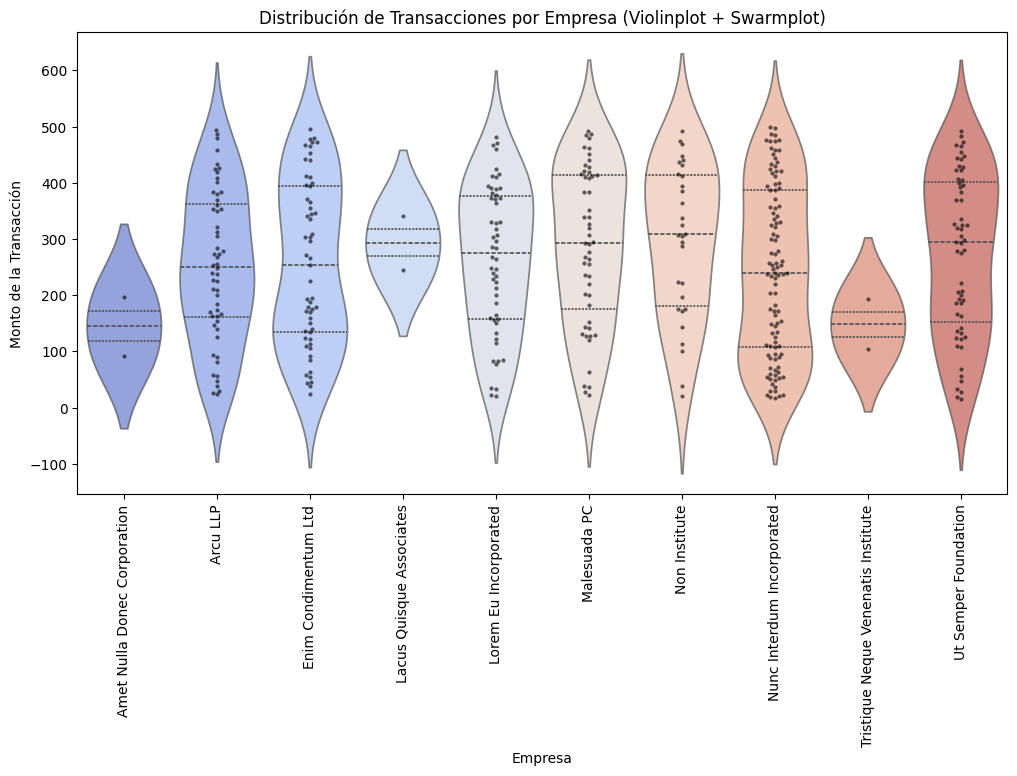

In [15]:
df_companyia = pd.merge(df_transactions, df_companies, left_on='business_id', right_on='company_id')

df_companyia['declined'] = df_companyia['declined'].astype(int)
top_n = 10
top_companies = df_companyia['company_name'].value_counts().nlargest(top_n).index
df_top = df_companyia[df_companyia['company_name'].isin(top_companies)]
df_top = df_top.sort_values(by="company_name")


plt.figure(figsize=(12,6))

sns.violinplot(data=df_top, x="company_name", y="amount", inner="quartile", palette="coolwarm", alpha=0.7)
sns.swarmplot(data=df_top, x="company_name", y="amount", color="black", size=3, alpha=0.6)

plt.xticks(rotation=90)
plt.xlabel("Empresa")
plt.ylabel("Monto de la Transacción")
plt.title("Distribución de Transacciones por Empresa (Violinplot + Swarmplot)")

plt.show()

## Ejercicio 2
***
**Generar un FacetGrid**

Este código genera un FacetGrid que muestra la distribución del total de las transacciones en los 5 países con más compras.<br>
Se utiliza un histograma con una curva KDE (sns.histplot()) en cada gráfico individual.<br>

Primero selecciono los 5 paises con mas compras  y filtro los datos para incluir solo esos paises. <br>
Despues creo el FacetGrid <br>
El FacetGrid es útil para comparar cómo varía la distribución de los montos de transacción entre distintos países.<br>
Se observa que algunos países tienen una distribución más dispersa, mientras que otros tienen montos de transacción más concentrados en ciertos rangos.<br>
El uso de kde=True permite visualizar mejor la forma de la distribución, más allá de las barras del histograma.<br>

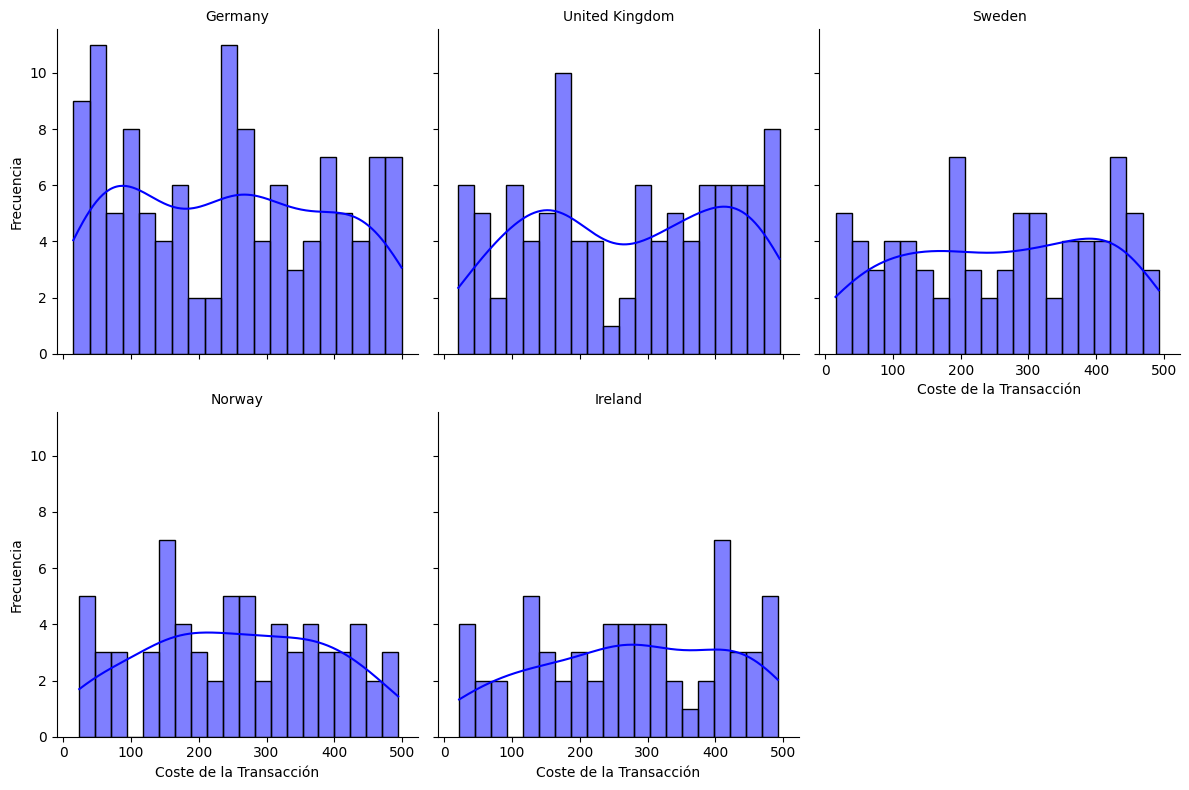

In [16]:

top_n = 5  
top_countries = df_companyia['country'].value_counts().nlargest(top_n).index
df_top = df_companyia [df_companyia ['country'].isin(top_countries)]

g = sns.FacetGrid(df_top, col="country", col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.histplot, "amount", bins=20, kde=True, color="blue")

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Coste de la Transacción", "Frecuencia")
plt.show()
